# Convolution Layer
- Previous examples of convolutions were used to distill vertical and horizontal information from the image.
- Consider how people see the world and classify objects. Instead of thinking about each 'pixels' of image and try to calculate the probability of individual pixels to be certain object, eye tries to capture some important characteristics of an image to notice the object.
    - Convolution layer is a great tool to find specific 'characteristic' of an image data, such as vertical, horizontal, curve, gradient, ect.
    - However, finding a correct shape of kernels is not an obvious task. This process of finding or developing the kernel to classify objects in this world might be equivalent to the process of babies growing.
    - It is computationally complex, but it can be model similar to any other neural network.
        - Instead of using constant kernel as before, if we set the kernel as a variable, we can use gradient descent method to find best kernels that classify the data.
        - Number of kernels or shape of each kernel can be also dynamically adjusted as a part of back-propagation.
        - This process is computationally large and complex, therefore we use more improvement techniques such as __pooling__, __dropout layer__, __ReLU cutout__.
        - Some pre-processing layers can be added, such as
            - normalizing dynamic range, auch as contrast
            - cropping: try to determine position of object in image
            - whitening: re-map the data from 0 to 1
        - To improve the resulting network, following approaches are also made for batched samples:
            - random cropping
            - random translating/flopping

In [22]:
# Settings
import keras

conv1_nKernel=32
dense1_output=64
dense2_output=10

## Prepare MNIST Dataset

In [4]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
t = y_train
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Dataset Viasualize

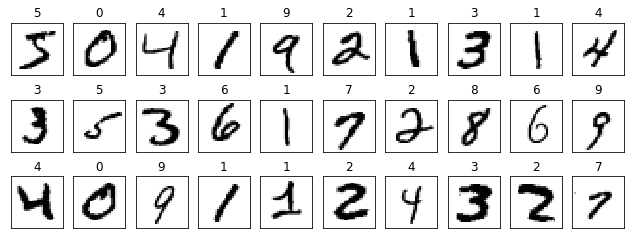

In [5]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(11,4))

for i in range(30):
    subplot = fig.add_subplot(3, 10, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % t[i])
    subplot.imshow(x_train[i].reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation='nearest')

In [26]:
x_train.shape

(60000, 784)

## Convolution Filter with Keras

In [20]:
import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import backend as K

In [23]:
# Build Layers
model = Sequential()

# First Convolution Layer (32 kernels)
model.add(Conv2D(conv1_nKernel, input_shape=(28,28,1),
                 kernel_size=(3,3),
                 padding='SAME',
                 activation='relu',
                 kernel_initializer = 'truncated_normal'
                ))

# Poolo
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(dense1_output, activation='tanh',
               kernel_initializer='truncated_normal',
               bias_initializer='zeros'
               ))
model.add(Dense(dense2_output, activation='softmax',
               kernel_initializer='zeros',
               bias_initializer='zeros'
               ))

In [24]:
# Define Compiler
model.compile(loss='categorical_crossentropy',
                      optimizer='rmsprop',
                      metrics=['accuracy'])

## Training

In [27]:
model.fit(x_train.reshape(-1,28,28,1), y_train, batch_size=100, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 43s 709us/step - loss: 0.3999 - acc: 0.8963
Epoch 2/10
60000/60000 [==============================] - 41s 682us/step - loss: 0.1131 - acc: 0.9667
Epoch 3/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0765 - acc: 0.9773
Epoch 4/10
60000/60000 [==============================] - 41s 688us/step - loss: 0.0596 - acc: 0.9820
Epoch 5/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0490 - acc: 0.9858
Epoch 6/10
60000/60000 [==============================] - 41s 681us/step - loss: 0.0413 - acc: 0.9881
Epoch 7/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0364 - acc: 0.9893
Epoch 8/10
60000/60000 [==============================] - 41s 682us/step - loss: 0.0334 - acc: 0.9900
Epoch 9/10
60000/60000 [==============================] - 41s 683us/step - loss: 0.0290 - acc: 0.9911
Epoch 10/10
60000/60000 [==============================] - 41s 684us/step - loss: 

In [30]:
result = model.evaluate(x_test.reshape(-1,28,28,1), y_test, verbose=0)
print('loss:', result[0], 'accuracy:', result[1])

loss: 0.040704571085236965 accuracy: 0.9871
